## Entrenamiento del modelo

En este notebook de vamos a ver cómo modelar datos mediante regresion lineal



Vamos a inventarnos un dataset para trabajar en este notebook. El dataset va a constar de una variable dependiente (cantidad de unidades vendidas) y las siguientes dos variables independientes: precio por unidad y gasto publicitario.

El dataset va a ser "sintético", creado por nosotros mismos. Primero inventamos valores para el precio por unidad y la inversión publicitaria:

### 1. Importar librerías necesarias

In [25]:
import numpy as np
import plotly.graph_objects as go
from sklearn.metrics import r2_score
#numpy: para operaciones numéricas.
#plotly.graph_objects: para crear gráficos interactivos en 3D


### 2. Crear los datos del problema

In [23]:
precio = np.array([24, 30, 43 , 101, 34, 94, 10, 15, 12, 44, 202, 156, 90])
X = precio.reshape(-1, 1)
x_vals = X.flatten()

print(x_vals)


[ 24  30  43 101  34  94  10  15  12  44 202 156  90]


Aquí, precio es la variable independiente (X).

Lo convertimos en una matriz columna (con .reshape(-1, 1)) para que sea compatible con cálculos posteriores.

### 3. Definir los parámetros reales y generar la variable dependiente (ventas)



* **beta** y **beta0** son los valores reales con los que se generó la relación lineal.
* con **mu** y **sigma** definimos los parámetros de una distribución normal (o gaussiana) para simular el error aleatorio en los datos (epsilon).
* **epsilon** es un error aleatorio para simular variabilidad real (ruido)
* **y** representa las ventas estimadas como una combinación lineal de precio + ruido.

In [14]:
beta, beta0 = -0.3, 100
mu, sigma = 0, 3

np.random.seed(42)
epsilon = np.random.normal(mu, sigma, X.shape[0])
y = (np.dot(np.transpose(X), beta) + beta0 + epsilon).round()
y = np.transpose(y)
print("Vector y (ventas generadas):")
print(y)


Vector y (ventas generadas):
[[ 94.]
 [ 91.]
 [ 89.]
 [ 74.]
 [ 89.]
 [ 71.]
 [102.]
 [ 98.]
 [ 95.]
 [ 88.]
 [ 38.]
 [ 52.]
 [ 74.]]


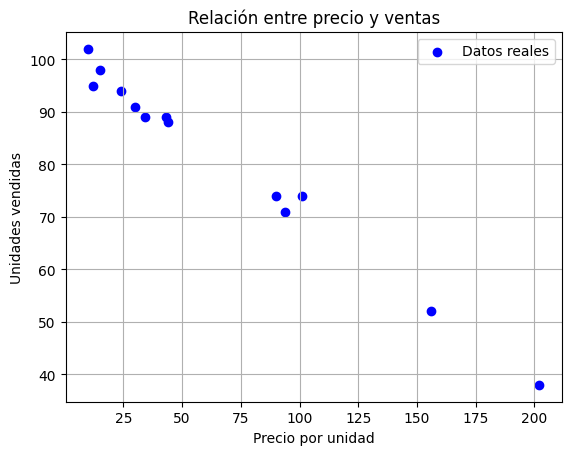

In [15]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue', label='Datos reales')
plt.xlabel("Precio por unidad")
plt.ylabel("Unidades vendidas")
plt.title("Relación entre precio y ventas")
plt.legend()
plt.grid(True)
plt.show()


### 4. Función para calcular el Error Cuadrático Medio




Dado un conjunto de parámetros beta0 y beta1, esta función calcula cuánto error comete el modelo al predecir y.


In [16]:
def error_cuadratico_medio(X, y, beta):
    error = 0.0
    for n, val in enumerate(y):
        y_est = beta[0] + beta[1] * X[n]
        error += (y_est - y[n]) ** 2
    return error / len(y)


### 5. Crear una grilla de posibles valores de beta0 y beta1

Estamos creando un espacio de búsqueda para beta0 y beta1.

meshgrid genera una matriz 2D para probar todas las combinaciones posibles.

In [17]:
beta0_vals = np.arange(-50, 200, 1)
beta1_vals = np.arange(-1, 1, 0.05)
B0, B1 = np.meshgrid(beta0_vals, beta1_vals)

print(B0, B1)


[[-50 -49 -48 ... 197 198 199]
 [-50 -49 -48 ... 197 198 199]
 [-50 -49 -48 ... 197 198 199]
 ...
 [-50 -49 -48 ... 197 198 199]
 [-50 -49 -48 ... 197 198 199]
 [-50 -49 -48 ... 197 198 199]] [[-1.   -1.   -1.   ... -1.   -1.   -1.  ]
 [-0.95 -0.95 -0.95 ... -0.95 -0.95 -0.95]
 [-0.9  -0.9  -0.9  ... -0.9  -0.9  -0.9 ]
 ...
 [ 0.85  0.85  0.85 ...  0.85  0.85  0.85]
 [ 0.9   0.9   0.9  ...  0.9   0.9   0.9 ]
 [ 0.95  0.95  0.95 ...  0.95  0.95  0.95]]


### 6. Calcular el error para cada combinación

In [18]:
Z = np.zeros(B0.shape)
for i in range(B0.shape[0]):
    for j in range(B0.shape[1]):
        Z[i, j] = error_cuadratico_medio(X, y, [B0[i, j], B1[i, j]])


<ipython-input-18-a670f2a06167>:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Se recorre la grilla completa y se calcula el ECM para cada par (beta0, beta1).

Z contiene el error correspondiente a cada punto.

### 7. Encontrar el mínimo del error

Se busca el punto donde el ECM es más bajo.

Este es el mejor ajuste posible de los parámetros

In [19]:
min_index = np.unravel_index(np.argmin(Z, axis=None), Z.shape)
min_beta0 = B0[min_index]
min_beta1 = B1[min_index]
min_error = Z[min_index]

print (min_error)


4.143846153846222


### 8. Crear el gráfico interactivo en 3D

Visualicemos la curva tridimensional que tengo que minimizar para encontrar los parametros: la curva del error cuadratico medio vs. beta0 y beta1.

Se marca el punto mínimo (go.Scatter3d) con un punto rojo.

In [20]:
fig = go.Figure(data=[
    go.Surface(z=Z, x=beta0_vals, y=beta1_vals, colorscale='Viridis', opacity=0.8),
    go.Scatter3d(x=[min_beta0], y=[min_beta1], z=[min_error],
                 mode='markers', marker=dict(size=6, color='red'),
                 name='Mínimo E.C.M.')
])

fig.update_layout(
    title='Superficie del Error Cuadrático Medio',
    scene=dict(
        xaxis_title='beta0',
        yaxis_title='beta1',
        zaxis_title='ECM'
    ),
    width=900,
    height=700
)
fig.show()


### 9. Ajustes con distintas combinaciones de parámetros

Ahora puedo adivinar valores de beta y obtener el error asociado.

In [21]:
print(error_cuadratico_medio(X,y,[60,0.4]))
print(error_cuadratico_medio(X,y,[60,-0.4]))
print(error_cuadratico_medio(X,y,[-60,0.4]))
print(error_cuadratico_medio(X,y,[100,-0.3])) # este es el valor real de los parametros

[1710.26769231]
[2280.97538462]
[14873.34461538]
[4.91307692]


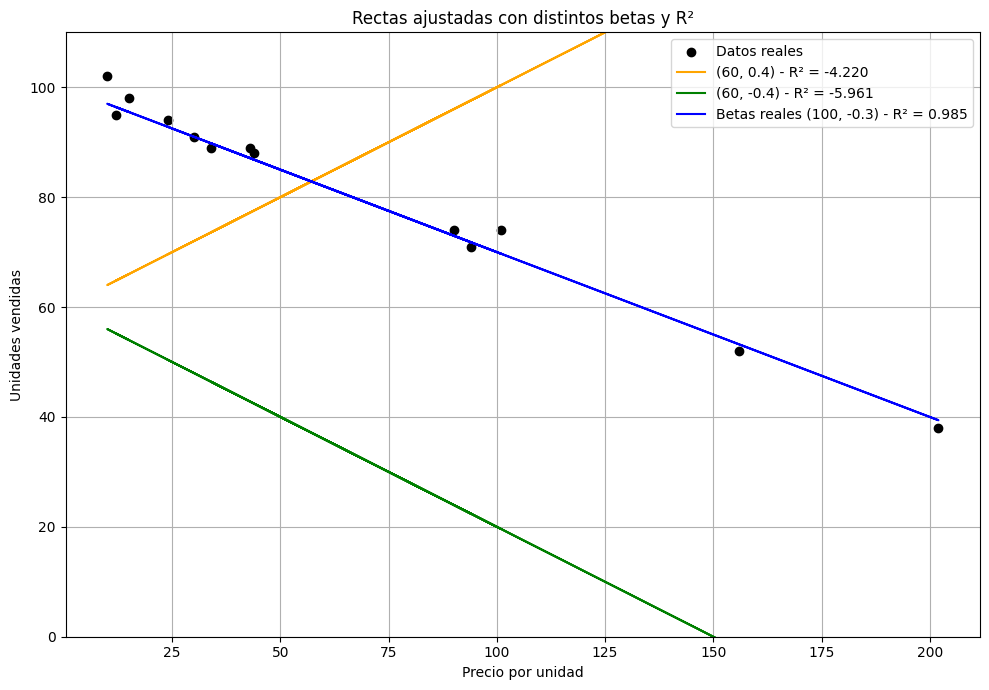

In [26]:
# Combinaciones de beta0 y beta1 a probar
beta_real, beta0_real = -0.3, 100

betas_prueba = [
    (60, 0.4),
    (60, -0.4),
    (beta0_real, beta_real),  # Betas reales
]



# Colores para las líneas
colores = ['orange', 'green', 'blue']
labels = ['(60, 0.4)', '(60, -0.4)', 'Betas reales (100, -0.3)']

# Calcular R² para cada combinación
r2_scores = []
for b0, b1 in betas_prueba:
    y_pred = b0 + b1 * x_vals
    r2 = r2_score(y, y_pred)
    r2_scores.append(r2)

# Agregar R² a las etiquetas
labels = [f'{label} - R² = {r2:.3f}' for label, r2 in zip(labels, r2_scores)]

#  Graficar
plt.figure(figsize=(10, 7))
plt.scatter(x_vals, y, color='black', label='Datos reales')

for (b0, b1), color, label in zip(betas_prueba, colores, labels):
    y_line = b0 + b1 * x_vals
    plt.plot(x_vals, y_line, label=label, color=color)

plt.xlabel("Precio por unidad")
plt.ylabel("Unidades vendidas")
plt.ylim(0, 110)
plt.title("Rectas ajustadas con distintos betas y R²")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




Ahora Vamos a emplear la implementación de [*LinearRegression*](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) contenida en el módulo [**sklearn**](https://scikit-learn.org/stable/index.html) de python. El módulo sklearn contiene implementaciones de una gran variedad de algoritmos de aprendizaje automático, y la manera de consumirlas es la misma.
Todas las implementaciones tienen tres métodos fundamentales:
- `fit`: Entrenamiento del modelo. En los algoritmos de aprendizaje supervisado los argumentos son un array de numpy con las observaciones, una observación en cada **fila** y un array con los targets
- `predict`: Explotar el modelo. El argumento es un numpy array con las observaciones del conjunto de test. La salida es el target estimado para cada fila del argumento de entrada
- `score`: Evaluar el modelo. Cada modelo tiene una función de *score* particular, que es el estadístico que se calcula sobre las  predicciones hechas para el conjunto de test y nos cuantifica la calidad de estas predicciones. En un problema de clasificación se emplea la **tasa de aciertos**, es decir la fracción de las observaciones de test para las que el modelo ha encontrado la predicción correcta. Los argumentos para invocar el método `score` son las observaciones de test y los target verdaderos de test, a fin de poder medir estadístico sobre las predicciones hechas por el modelo y estos *targets* reales.

Scikit-learn no solamente es útil, sino que su documentación es excelente. Les recomendamos entrar a la página web y explorarla. Creemos que es posible aprender un montón de machine learning únicamente mirando la documentación de scikit-learn.



El proceso de ajustar modelos con scikit-learn es siempre el mismo:

1.   Creamos un objeto que representa el modelo, pasándole los parámetros correspondientes.
2.   Entrenamos el modelo con los datos.
3.   Usamos el modelo para predecir el valor de nuevos datos.



In [27]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)

estimated = [reg.intercept_, reg.coef_]  # los parametros estimados
print(estimated)

R2 = reg.score(X,y) # R2
print(R2)


[array([101.75853888]), array([[-0.31328773]])]
0.9891736332783381


Vamos a graficar la recta teórica junto con la que mejor ajusta los datos.

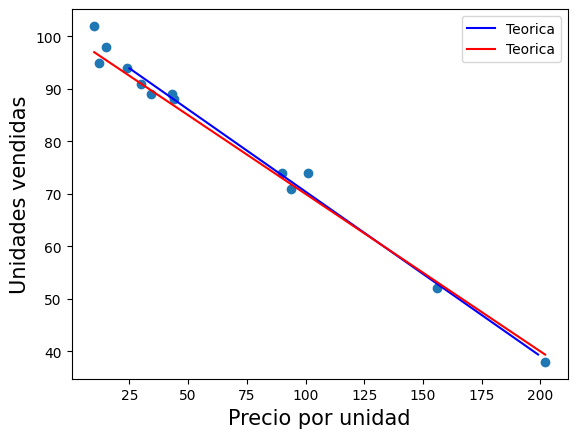

In [28]:
plt.scatter(X,y)
plt.ylabel(r'Unidades vendidas', fontsize=15, color='black')
plt.xlabel(r'Precio por unidad', fontsize=15, color='black')

x_var = np.arange( X.min(), X.max(), 0.001)
y_var = estimated[0] + x_var*estimated[1]
y_var_est = 100 + x_var*(-0.3)

#plt.plot(x_var,np.transpose(y_var),label="Estimado", color='b')
x = np.arange(25,200,1)
ypred = reg.predict(x.reshape(-1, 1))
plt.plot(x,ypred,label="Teorica", color='b')
plt.plot(x_var,np.transpose(y_var_est),label="Teorica", color='r')

plt.legend(loc='upper right')

Supongamos que agregamos más datos y conocemos el precio por unidad. ¿Cuál es la predicción sobre la cantidad de unidades vendidas?

Text(0.5, 0, 'Precio por unidad')

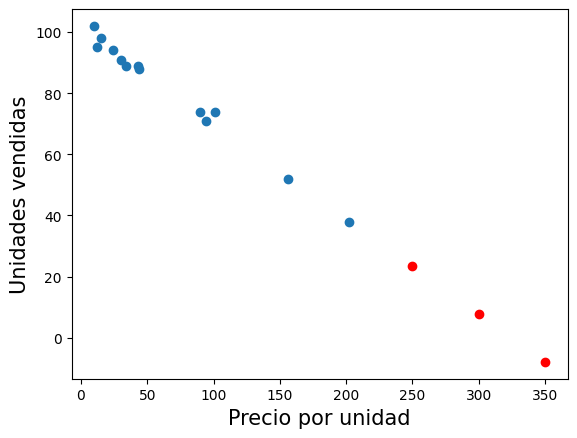

In [29]:
precios_nuevo = np.array([250, 300, 350])
X_nuevo = precios_nuevo.reshape(-1, 1)

y_nuevo = reg.predict(X_nuevo)  # hago la prediccion para estos nuevos valores

plt.scatter(X,y)
plt.scatter(X_nuevo,y_nuevo, color='r')

plt.ylabel(r'Unidades vendidas', fontsize=15, color='black')
plt.xlabel(r'Precio por unidad', fontsize=15, color='black')


Veamos por último el caso de la regresión usando dos variables independientes: el precio por unidad y el gasto de publicidad.

Primero creo una matriz que contenga ambas variables y luego simulo los datos multiplicando cada fila por su coeficiente, y agregando ruido normalmente distribuido.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

# 1. Simular los datos
precio = np.array([24, 30, 43 , 101, 34, 94, 10, 15, 12, 44, 202, 156, 90])
gasto = np.array([2000, 4801, 210, 10000, 6000, 503, 491, 4000, 9200, 1000, 1500, 1800, 3000])
X = np.column_stack((precio, gasto))  # Variables independientes

# Parámetros reales
beta = np.array([-0.3, 0.1])
beta0 = 20
mu, sigma = 0, 3
epsilon = np.random.normal(mu, sigma, X.shape[0])
y = (np.dot(X, beta) + beta0 + epsilon).round()

Ahora que ya simulé los datos, voy crear y estimar el modelo de regresión.

In [31]:
reg = LinearRegression()
reg.fit(X,y)

estimated = [reg.intercept_, reg.coef_[0], reg.coef_[1]]

print(estimated)

R2 = reg.score(X,y) # R2
print(R2)


[np.float64(18.2331425229994), np.float64(-0.30869866760894776), np.float64(0.10016641968333127)]
0.9999296757017724


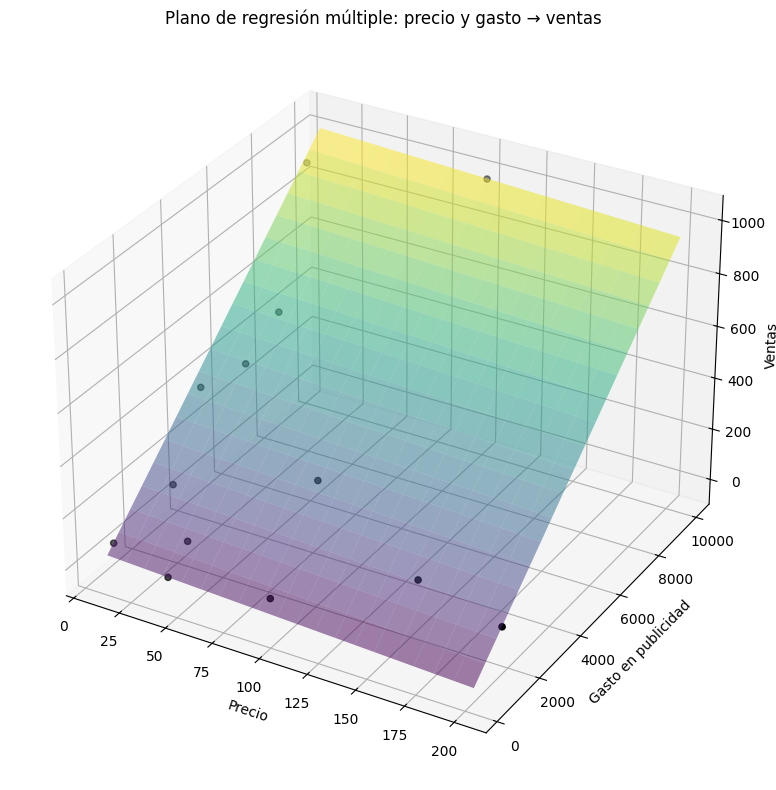

In [32]:

# 3. Crear grilla para graficar el plano
precio_range = np.linspace(min(precio), max(precio), 20)
gasto_range = np.linspace(min(gasto), max(gasto), 20)
P, G = np.meshgrid(precio_range, gasto_range)

# 4. Calcular valores Z del plano de regresión
Z = reg.intercept_ + reg.coef_[0] * P + reg.coef_[1] * G

# 5. Gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Puntos reales
ax.scatter(precio, gasto, y, color='black', label='Datos reales')

# Plano de ajuste
ax.plot_surface(P, G, Z, alpha=0.5, cmap='viridis', edgecolor='none')

# Etiquetas
ax.set_xlabel('Precio')
ax.set_ylabel('Gasto en publicidad')
ax.set_zlabel('Ventas')
ax.set_title('Plano de regresión múltiple: precio y gasto → ventas')
plt.tight_layout()
plt.show()
